<a href="https://colab.research.google.com/github/priya-200/data-Science-projects/blob/master/Multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi class classification

1. Become one with data
2. Preprocess the data
3. Create the model
4. Fit the model(overfit the data)
5. Evaluate our model
6. Adjust different hyperparameter and improve the model to beat the baseline model
7. Repeat until satisfied

## Get the Data!!

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#  Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-04-30 16:21:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.207, 173.194.212.207, 173.194.213.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   120MB/s    in 4.1s    

2024-04-30 16:21:59 (121 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



## Import Statements

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import random

## Getting the paths and filenames of the data

In [3]:
import os

# Walk through classes of food image data
for dirpath,dirname,filename in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directory and {len(filename)} images in {dirpath}")

There are 2 directory and 0 images in 10_food_classes_all_data
There are 10 directory and 0 images in 10_food_classes_all_data/test
There are 0 directory and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directory and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directory and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directory and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directory and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directory and 250 images in 10_food_classes_all_data/test/steak
There are 0 directory and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directory and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directory and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directory and 250 images in 10_food_classes_all_data/test/fried_rice
There are 10 directory and 0 images in 10_food_classes_all_data/train


In [7]:
# Setup the train and test directory

train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [8]:
#Let's get the class name

import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [9]:
from PIL import Image

def view_random_image():
    food = random.choice(class_names)
    img_dir = f'{train_dir}{food}/'
    rand_img_filename = random.choice(os.listdir(img_dir))
    rand_img_path = os.path.join(img_dir, rand_img_filename)

    # Load and display the image
    img = Image.open(rand_img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(food)
    plt.show()

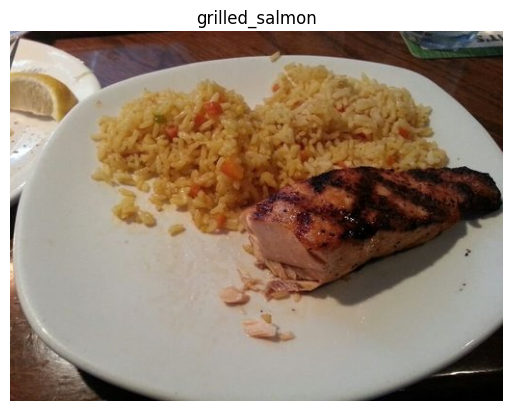

In [10]:
view_random_image()

## Preprocess the data

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.3,
    horizontal_flip = True,
)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [17]:
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [27]:
image,label = next(train_data)
len(train_data),len(image),len(label)

(235, 32, 32)

(-0.5, 223.5, 223.5, -0.5)

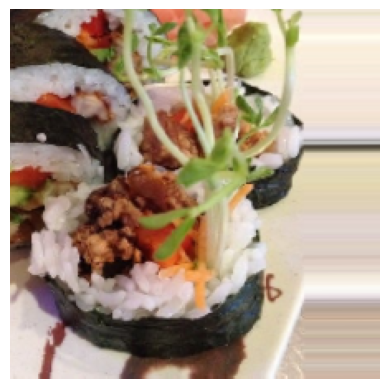

In [33]:
n = random.randint(0, 32)
plt.imshow(image[n])
plt.axis("off")

# CNN MODEL

In [43]:
# Baseline

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        strides = 1,
        padding = 'valid',
        activation = 'relu',
        input_shape = (224,224,3)
    ),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [44]:
model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [45]:
history_1 = model_1.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/10
235/235 [==============================] - 106s 441ms/step - loss: 2.1771 - accuracy: 0.2023 - val_loss: 2.1110 - val_accuracy: 0.2796
Epoch 2/10
235/235 [==============================] - 104s 441ms/step - loss: 2.0660 - accuracy: 0.2739 - val_loss: 1.9020 - val_accuracy: 0.3344
Epoch 3/10
235/235 [==============================] - 104s 443ms/step - loss: 2.0241 - accuracy: 0.2929 - val_loss: 1.9427 - val_accuracy: 0.3312
Epoch 4/10
235/235 [==============================] - 104s 442ms/step - loss: 1.9917 - accuracy: 0.3121 - val_loss: 1.8441 - val_accuracy: 0.3808
Epoch 5/10
235/235 [==============================] - 104s 444ms/step - loss: 1.9492 - accuracy: 0.3299 - val_loss: 1.8721 - val_accuracy: 0.3712
Epoch 6/10
235/235 [==============================] - 104s 445ms/step - loss: 1.9327 - accuracy: 0.3335 - val_loss: 1.8960 - val_accuracy: 0.3772
Epoch 7/10
235/235 [==============================] - 105s 447ms/step - loss: 1.9063 - accuracy: 0.3476 - val_loss: 1.7501 -

## Save model

In [91]:
def save_model(model,number):
  directory = '/content/drive/MyDrive/Data science/Multi class classification'
  model_path = directory+f'/model_{number}.h5'
  model.save(model_path)
  return model_path

In [71]:
def load_model(path):
  return tf.keras.models.load_model(path)

# Evaluate the model

In [47]:
model_1.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 1.7537 - accuracy: 0.4232


[1.753687858581543, 0.42320001125335693]

In [64]:
def loss_curves(history):
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel("Epochs")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.title("Accuarcy")
    plt.legend()

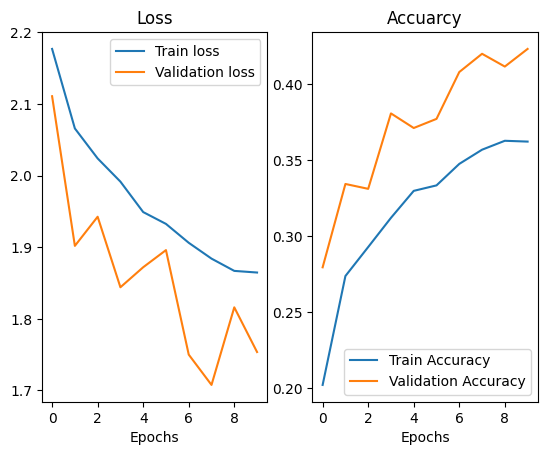

In [62]:
plt.subplot(1, 2, 1)
plt.plot(history_1['loss'], label='Train loss')
plt.plot(history_1['val_loss'], label='Validation loss')
plt.xlabel("Epochs")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1['accuracy'], label='Train Accuracy')
plt.plot(history_1['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.title("Accuarcy")
plt.legend()

In [60]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 29160)            

In [92]:
save_model(model_1,1)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/Data science/Multi class classification/model_1.h5'

In [93]:
model_1 = load_model('/content/drive/MyDrive/Data science/Multi class classification/model_1.h5')
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 29160)            

In [65]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [66]:
model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [68]:
history_2 = model_2.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/10
235/235 [==============================] - 120s 505ms/step - loss: 2.2116 - accuracy: 0.1912 - val_loss: 2.0369 - val_accuracy: 0.2708
Epoch 2/10
235/235 [==============================] - 112s 476ms/step - loss: 2.0736 - accuracy: 0.2619 - val_loss: 1.9063 - val_accuracy: 0.3132
Epoch 3/10
235/235 [==============================] - 111s 472ms/step - loss: 2.0060 - accuracy: 0.2923 - val_loss: 1.8483 - val_accuracy: 0.3484
Epoch 4/10
235/235 [==============================] - 105s 446ms/step - loss: 1.9648 - accuracy: 0.3179 - val_loss: 1.8237 - val_accuracy: 0.3808
Epoch 5/10
235/235 [==============================] - 104s 444ms/step - loss: 1.9445 - accuracy: 0.3332 - val_loss: 1.7946 - val_accuracy: 0.3704
Epoch 6/10
235/235 [==============================] - 110s 467ms/step - loss: 1.9134 - accuracy: 0.3384 - val_loss: 1.8970 - val_accuracy: 0.3696
Epoch 7/10
235/235 [==============================] - 106s 450ms/step - loss: 1.8874 - accuracy: 0.3467 - val_loss: 1.7461 -

In [94]:
save_model(model_2,2)

'/content/drive/MyDrive/Data science/Multi class classification/model_2.h5'

In [95]:
model_2 = load_model('/content/drive/MyDrive/Data science/Multi class classification/model_2.h5')

In [96]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 111ms/step - loss: 1.6699 - accuracy: 0.4440


[1.669890284538269, 0.4440000057220459]

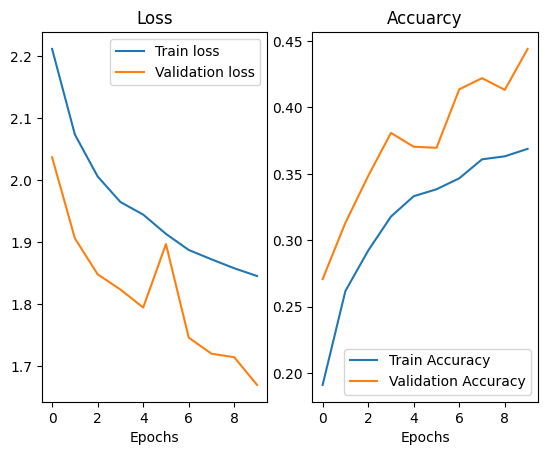

In [97]:
loss_curves(history_2)

In [98]:
import matplotlib.image as mpimg
!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg'
sushi = mpimg.imread("03-sushi.jpeg")

--2024-04-30 16:07:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.06s   

2024-04-30 16:07:06 (29.3 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]



In [99]:
# Create a function to import an image and resize it to be able to be used in our prediction process

def load_image(filename,img_shape=224):
  '''
  Read a image from filename and reshape it into (224,224,3)
  '''

  #Reads in image
  img = tf.io.read_file(filename)
  #Decode the image into tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img,size = [img_shape,img_shape])
  #rescale the image
  img = img/255.
  return img

In [104]:
sushi = load_image('/content/03-sushi.jpeg')
sushi.shape

TensorShape([224, 224, 3])

In [110]:
sushi_preds = model_2.predict(tf.expand_dims(sushi, axis=0))

1/1 [==============================] - 0s 31ms/step


In [116]:
sushi_preds.argmax()

3

In [117]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [126]:
! wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg'
hamburger = '03-hamburger.jpeg'
hamburger = load_image('/content/03-hamburger.jpeg')
hamburger_preds = model_2.predict(tf.expand_dims(hamburger, axis=0))

--2024-04-30 16:18:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.1’

03-hamburger.jpeg.1 100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2024-04-30 16:18:22 (49.0 MB/s) - ‘03-hamburger.jpeg.1’ saved [3564285/3564285]

1/1 [==============================] - 0s 32ms/step


In [128]:
hamburger_preds.argmax()

6

In [123]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [130]:
model_1.predict(tf.expand_dims(hamburger, axis=0)).argmax()

1/1 [==============================] - 0s 38ms/step


8

In [131]:
model_1.predict(tf.expand_dims(sushi, axis=0)).argmax()

1/1 [==============================] - 0s 22ms/step


1